<span style="color:red">Abgegeben von (Name, Vorname):</span> 
Elsherif, Mohamed (6378374)

Wie immer müssen wir zuerst das NLTK-Modul laden. Außerdem importieren wir das Brown Corpus.

In [1]:
import nltk
from nltk.corpus import brown

Immer griffbereit:
- Website: https://www.nltk.org/
- Buch: https://www.nltk.org/book/ch07.html
- Module: https://www.nltk.org/py-modindex.html
- Beispiele: http://www.nltk.org/howto/

<br>
<font size="6"><strong>2. Sitzung: Morphologie & Normalisierung</strong></font> 
<br>
<br>

**Warum Normalisierung der Wortform?**

- Wenn wir wissen wollen, wie groß der Wortschatz eines Textes ist.
- Wenn wir wissen wollen, wie oft bestimmte Begriffe in einem Text vorkommen.
    - z.B. Information Retrieval, Textklassifizierung
- Wenn wir Suchanfragen verallgemeinern möchten.
- ...

Die Normalisierung ist besonders interessant bei Sprachen mit reicher Flexion. Dazu gehört das Deutsche.

# Morphologie

(Hinweis: Eine ausführlichere Kurzeinleitung gibt es in den beigestellten Folien `skript-morphologie-wortbegriffe.pdf`).

Die Morphologie innerhalb der Linguistik beschäftigt sich mit dem **inneren Aufbau von Wortformen** anhand von Morphemen.

Es gibt verschiedene Arten von **Morphemen**:
- **Wurzel**: der kleinste Teil eines Wortes, der die zentralen semantischen Informationen beiträgt und kein Affix enthält.
    - z.B. *zer-**leg**-en*
- **Derivationsaffixe**: eine geschlossene Klasse von Morphemen, die die Wortart (Nomen, Verb, Adjektiv, ...) bestimmen können
    - z.B. **zer**-*leg-en*
- **Stamm**: der Teil eines Wortes, der die Wurzel und alle Derivationsaffixe enthält.
    - z.B. **zer-leg**-*en*
- **Flexionsaffixe**: eine geschlossene Klasse von Morphemen, die immer an letzter Stelle im Wort stehen und bestimmte semantische (Genus, Komparation, Person, Numerus, Aspekt, Aktionsart, Tempus, Modus) oder funktionale (Kasus) Informationen beitragen.
    - z.B. *zer-leg*-**en**

Unter Normalisierung im Bereich der Morphologie versteht man die Ersetzung einer Wortform durch ihren Stamm (Stemming) oder durch eine Zitationsform oder Lemma (Lemmatisierung).


# Normalisierung der Groß-/Kleinschreibung

Die einfachste Form der Normalisierung ist die Vereinheitlichung der Groß-/Kleinschreibung.

Zum Beispiel kann man durchgängig die Kleinschreibung verwenden. Dafür steht die String-Funktion `lower()` zur Verfügung.

In [2]:
word = "Peter went to the White House and read the New York Times."
word.lower()

'peter went to the white house and read the new york times.'

Das Problem bei dieser rasenmäherartigen Normalisierung besteht darin, dass gewisse Unterscheidungsmöglichkeiten hinsichtlich der Bedeutung verloren gehen können.

- *White House* $\Rightarrow$ *white house* 
- *Peter* $\Rightarrow$ *peter* (*to peter out* bedeutet 'versiegen')

Trotzdem kann diese Art der Normalisierung je nach Anwendung sinnvoll sein, z.B. bei der groben Klassifizierung größerer Textmengen.

Doch es geht noch extremer ...

# Stemming (Rückschnitt)

Als Stemming bezeichnet man Verfahren, die die Suffixe eines Wortes tilgen und dadurch unterschiedliche Wortformen vereinheitlichen: 

- *connect* $\Rightarrow$ *connect*
- *connected* $\Rightarrow$ *connect*
- *connecting* $\Rightarrow$ *connect*
- *connection* $\Rightarrow$ *connect*
- *connections* $\Rightarrow$ *connect*

Man beachte: 
- Solche Verfahren zielen **nicht** auf eine linguistisch adäquate Bildung des Stammes! Das ist Thema der Computationellen Morphologie bzw. Ziel des morphologischen Parsens. (siehe https://aclweb.org/aclwiki/Morphology_software_for_English)
- Solche Verfahren können die Grenze zwischen Wortarten verwischen.
    - *connection* $\Rightarrow$ *connect*
    - *connects* $\Rightarrow$ *connect*
- Der Übergang zwischen nützlichem und schädlichem Stemming ist fließend und auch abhängig von der Anwendung.
    - *relate* $\Rightarrow$ *relate*
    - *relativity* $\Rightarrow$ *relate*    (schädlich?)
    - *organ* $\Rightarrow$ *organ*  
    - *organization* $\Rightarrow$ *organ*    (schädlich!)
   

## Funktionsweise

Die Funktionsweise ist vergleichsweise simpel: Das Stemming wird von bedingten Ersetzungsregeln der Form 
- `(condition) S1 -> S2`

kontrolliert, wobei `S1` durch `S2` ersetzt wird, wenn `condition` erfüllt ist.

Die Stemmingverfahren unterscheiden sich im Prinzip darin, was in `condition`, `S1` und `S2` stehen kann, wie diese Regeln geordnet sind (das längste `S1` gewinnt!), und ob es mehrere Durchläufe gibt.

## Stemming mit regulären Ausdrücken

Die einfachsten Stemming-Methoden verwenden reguläre Ausdrücke für Affixe, die getilgt werden, falls Sie am Ende der Wortform stehen. (Dann werden die Affixe auch *Suffixe* genannt.) Die Regeln sehen also so aus:

- `(S1 steht am Ende) S1 -> ""`

Mit der String-Methode `endswith()` lässt sich das ohne Probleme umsetzen (siehe https://www.nltk.org/book/ch03.html):  

In [3]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
         if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

Dasselbe geht natürlich auch sehr einfach mit regulären Ausdrücken.

In [4]:
import re
def stem2(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0] # re.findall returns a list of pairs 
    return stem

In [5]:
[stem2(word) for word in ["connections", "is"]]

['connection', 'i']

Diese beiden einfachen Stemmer haben natürlich diverse Einschränkungen: 
- keine Mindestlänge
- nur Tilgungen (Problem: *women* $\Rightarrow$ *woman*)
- keine Mehrfachtilgung (wie beim Beispiel mit *connections* oben)

NLTK enthält ein Modul für die Entwicklung eines einfachen [RegExp-Stemmers](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.regexp) (`RegexpStemmer` in `nltk.stem`), der zumindest die Angabe einer Mindestlänge zulässt.

In [6]:
from nltk.stem import RegexpStemmer
st = RegexpStemmer('ing$|s$|e$|able$', min=4)
[st.stem(word) for word in ["connections", "is"]]

['connection', 'is']

Neben `RegexpStemmer` enthält NLTK aber auch fertige Stemmer für eine Reihe von Sprachen (darunter Arabisch!).

## Stemmer fürs Englische


Für das Englische stehen im Modul `nltk.stem` gleich drei Standard-Stemmer zu Auswahl:

- der Porter-Stemmer (`PorterStemmer`)
    - Ein sehr früher Stemmer aus den späten 1970ern.
    - https://tartarus.org/martin/PorterStemmer/index.html
    - Regeln der Form `(condition) S1 -> S2` mit nur einem Durchlauf, aber unterschiedliche "Schritte".
- der Lancaster-Stemmer (`LancasterStemmer`)
    - rekursive Anwendung der Stemming-Regeln $\Rightarrow$ Gefahr des Overstemming
    - https://dl.acm.org/citation.cfm?id=101310
- der Snowball-Stemmer (`SnowballStemmer`)
    - Weiterentwicklung des Porter Stemmers
    - derzeit der Standard-Stemmer
    - verfügbar auch für andere Sprachen 
    - http://snowball.tartarus.org/texts/introduction.html


In [7]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
pst = PorterStemmer()
lst = LancasterStemmer()
sste = SnowballStemmer("english")

In [8]:
word_list = ["connections","connectionistic","flies","friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstandings","railroad","moonlight","football","women","woman","ate","at","generously"]
print("{0:20}{1:20}{2:20}{3:20}".format("Input","Porter Stemmer","Lancaster Stemmer","Sowball Stemmer"))
print("{0:20}{1:20}{2:20}{3:20}".format("-----","--------------","-----------------","---------------"))
for word in word_list:
    print("{0:20}{1:20}{2:20}{3:20}".format(word,pst.stem(word),lst.stem(word),sste.stem(word)))

Input               Porter Stemmer      Lancaster Stemmer   Sowball Stemmer     
-----               --------------      -----------------   ---------------     
connections         connect             connect             connect             
connectionistic     connectionist       connect             connectionist       
flies               fli                 fli                 fli                 
friend              friend              friend              friend              
friendship          friendship          friend              friendship          
friends             friend              friend              friend              
friendships         friendship          friend              friendship          
stabil              stabil              stabl               stabil              
destabilize         destabil            dest                destabil            
misunderstandings   misunderstand       misunderstand       misunderstand       
railroad            railroad

## Stemmer fürs Deutsche


NLTK enthält zwei fertige Stemmer für das Deutsche. 

- der Snowball Stemmer, den wir oben schon fürs Englische gesehen haben
- der Cistem Stemmer
    - entwickelt an der LMU München
    - http://www.cis.lmu.de/~weissweiler/cistem/
    - Funktionsweise: 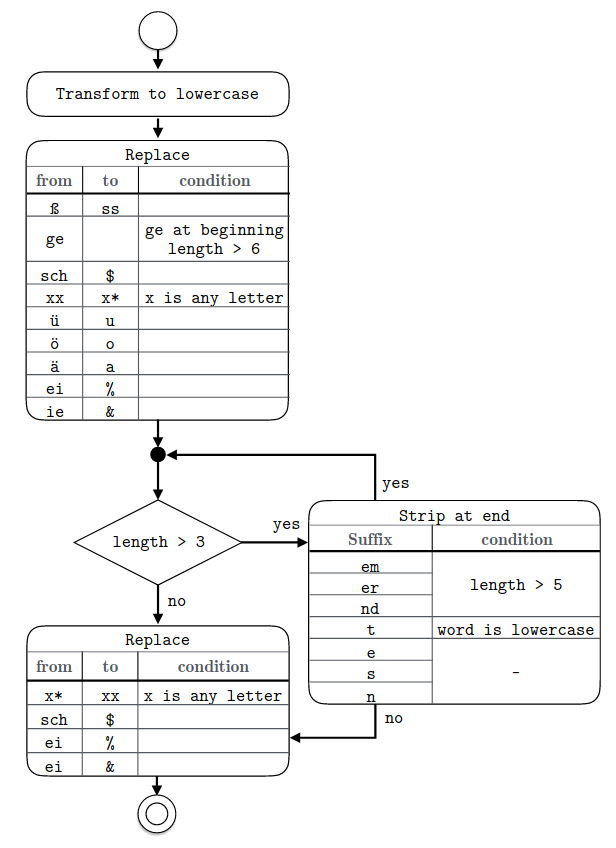

<span style="color:red">Frage am Rande:</span> Wer findet den Fehler in dieser Darstellung?

In [9]:
from nltk.stem import SnowballStemmer
from nltk.stem.cistem import Cistem
sstg = SnowballStemmer("german")
cist = Cistem()

In [10]:
word_list = ["Adler","Adlers","Adlern","aß","gab","Häuser","Hau","Absurditäten","Mäuserich","schmeckte"]
print("{0:20}{1:20}{2:20}".format("Input","Snowball Stemmer","Cistem Stemmer"))
print("{0:20}{1:20}{2:20}".format("-----","----------------","--------------"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,sstg.stem(word),cist.stem(word)))

Input               Snowball Stemmer    Cistem Stemmer      
-----               ----------------    --------------      
Adler               adl                 adler               
Adlers              adl                 adler               
Adlern              adl                 adler               
aß                  ass                 ass                 
gab                 gab                 gab                 
Häuser              haus                hau                 
Hau                 hau                 hau                 
Absurditäten        absurditat          absurditat          
Mäuserich           mauserich           mauserich           
schmeckte           schmeckt            schmeck             


## Evaluierung

Die Evaluierung eines Stemmers läuft im Prinzip so ab: 

- Es gibt eine festgelegte **Testmenge** und eine gewünschte Ausgabe (der sogenannte **Gold-Standard**).
- Es wird mit bestimmten **Evaluationsmaßen** (Precision, Recall, F1-Measure, Accuracy) gemessen, wie nah der Stemmer für die Testmenge am Gold-Standard dran ist.
- Es wird die **Geschwindigkeit** des Stemmers gemessen.

Das grundsätzliche Problem: 
- Der Gold-Standard steht nicht wirklich fest und ist abhängig von der Anwendung und dem linguistischen Anspruch.
- Es ist prinzipiell unklar, wie man Geschwindigkeit und Qualität miteinander verrechnen kann.
- Die Evaluationsergebnisse gelten nur für die Testmenge.

Siehe das [Cistem-Papier](http://www.cis.lmu.de/~weissweiler/cistem/) für ein Beispiel für die Evaluation eines Stemmers.

## <span style="color:red">Aufgaben I</span>

<span style="color:red">A1-1:</span> Wenden Sie den Snowball-Stemmer auf die Textsorte "news" im Brown-Korpus an, indem die Form jedes Worttokens jeweils durch das Resultat des Stemmers ersetzt wird!

In [11]:
# Lösung zu A1-1

# Definiere den Snowball-Stemmer für Englisch
stemmer = SnowballStemmer("english")

# Holen der Sätze aus der Textkategorie "news"
news_sentences = brown.sents(categories='news')

# Stemming der Wörter in den "news"-Sätzen
stemmed_sentences = []
for sentence in news_sentences:
    # Anwenden des Stemmers auf jedes Wort im Satz
    stemmed_sentence = [stemmer.stem(word) for word in sentence]
    # Füge den gestemmten Satz zur Liste hinzu
    stemmed_sentences.append(stemmed_sentence)

# Output der ersten 3 Sätze
for i in range(3):
    print('Original:', ' '.join(news_sentences[i]))
    print('Stemmed:', ' '.join(stemmed_sentences[i]))
    print()

Original: The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
Stemmed: the fulton counti grand juri said friday an investig of atlanta recent primari elect produc `` no evid '' that ani irregular took place .

Original: The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
Stemmed: the juri further said in term-end present that the citi execut committe , which had over-al charg of the elect , `` deserv the prais and thank of the citi of atlanta '' for the manner in which the elect was conduct .

Original: The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayo

<span style="color:red">A1-2:</span> Um wieviel Prozent verringert sich die Anzahl der Wortformen im News-Teil des Brown-Korpus _nur_ durch das Stemmen? 

In [12]:
# Lösung A1-2

# Reduziere die list of Wörter (aus sentences) into eine Liste für original und root Wörter.
original_words = [word for sentence in news_sentences for word in sentence]
stemmed_words = [word for sentence in stemmed_sentences for word in sentence]

# Berechne the number der unique word forms before und nach dem Stemming.
unique_words_before = set(original_words)
unique_words_after = set(stemmed_words)

# Berechne the precentage Rückgang der unique word forms.
original_count = len(unique_words_before)
stemmed_count = len(unique_words_after)
percentage_decrease = ((original_count - stemmed_count) / original_count) * 100

print(f"Number of unique word forms before stemming: {original_count}")
print(f"Number of unique word forms after stemming: {stemmed_count}")
print(f"Percentage decrease in word forms due to stemming: {percentage_decrease}%")

Number of unique word forms before stemming: 14394
Number of unique word forms after stemming: 9312
Percentage decrease in word forms due to stemming: 35.30637765735723%


Aber dem Zipf'schen Gesetz entkommt man auch durch das Stemming nicht:

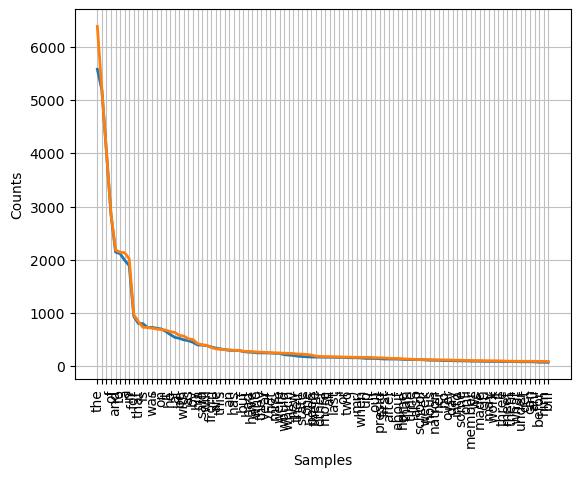

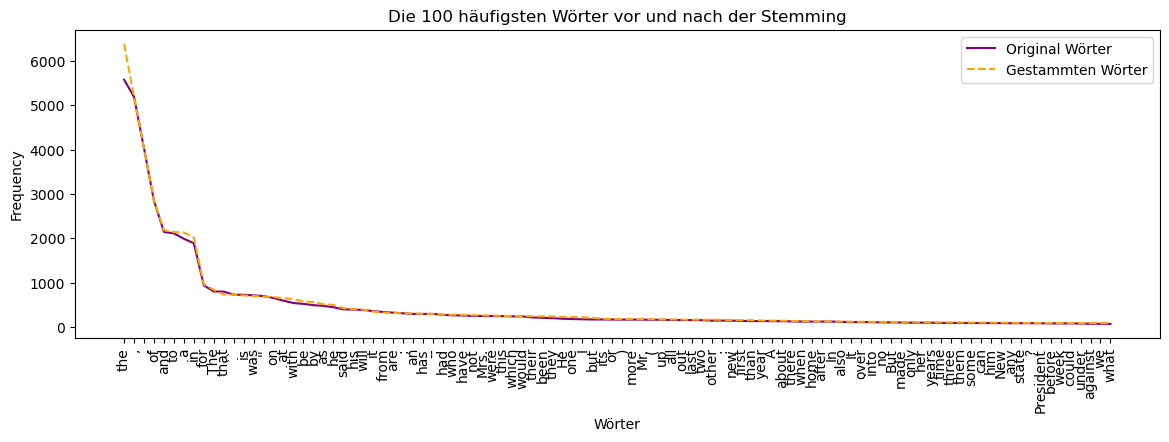

In [13]:
#%matplotlib notebook
#fd.plot(100)

### Es war unklar, ob dies eine zu erledigende Aufgabe ist oder nicht. Deshalb habe ich sie vorsichtshalber gemacht ###
from nltk.probability import FreqDist

######## Verwendung der FreqDist Plot methode ########
# Frequency der Originalwörter
original = FreqDist(original_words)
original.plot(100)

# Frequency der gestammten Wörter
stemmed = FreqDist(stemmed_words)
stemmed.plot(100)

######## Verwendung von Matplotlib ########
import matplotlib.pyplot as plt

# Die 100 häufigsten Wörter und ihre frequencies Extraktieren
top_original_wörter = original.most_common(100)
top_stemmed_wörter = stemmed.most_common(100)

# Wörter und frequency für original und stemmed Extraktieren
original_wörter, original_freqs = zip(*top_original_wörter)
stemmed_wörter, stemmed_freqs = zip(*top_stemmed_wörter)

# Plot original und stemmed frequencies
plt.figure(figsize=(14, 4))
plt.plot(original_freqs, label="Original Wörter", color="purple")
plt.plot(stemmed_freqs, label="Gestammten Wörter", color="orange", linestyle='--')

# Custom Wörter labels wie x-ticks legen 
plt.xticks(ticks=range(len(original_wörter)), labels=original_wörter, rotation=90)
plt.title("Die 100 häufigsten Wörter vor und nach der Stemming")
plt.xlabel("Wörter")
plt.ylabel("Frequency")
plt.legend()
plt.grid(False)
plt.show()

<span style="color:red">Frage am Rande:</span> Um wieviel Prozent verringert sich die Anzahl der Wort**token**?    <span style="color:darkblue"><strong> 0% This is because stemming only changes the shape of each individual word token, but not the total number of tokens in the texts themselves</strong></span>

# Lemmatisierung

Die Lemmatisierung ist eine weitere Form der Wortnormalisierung und dem Stemming sehr ähnlich. 

Unter Lemmatisierung versteht man die Abbildung einer Wortform auf ein **Lemma**. 

*Definition Lemma* (siehe Folien)
> Ein Lemma besteht aus allen Wortformen derselben Wortart, die aus einem Stamm mittels Flexion & (Vokal-)Modifikation gebildet werden können.

Was wir bei der Lemmatisierung aber eigentlich wollen, ist nicht eine Menge von Wortformen, sondern **eine** Wortform, die das Lemma repräsentiert, die sogenannte *Basisform*, *Zitierform* oder *Lemmaform* – kurz: Lemma.

Es gibt bestimmte Konventionen, wie die **Zitierform** für ein Lemma gewählt wird. Z.B. ist üblicherweise das Lemma eines Verbs die Infinitivform und das Lemma eines Nomens die Nominativ-Singular-Form.  

Wichtig ist aber eigentlich nur, dass unterschiedliche Lemmata unterschiedliche Ziterformen haben. 

- {*house*, *houses*, *housed*, *housing*} $\Rightarrow$ <span style="font-variant: small-caps;">house.V</span>
- {*house*, *houses*} $\Rightarrow$ <span style="font-variant: small-caps;">house.N</span>

So genau nehmen es aber Lemmatisierer nicht unbedingt und verlassen sich, was die Wortart betrifft, gerne auf den POS-Tagger. 

## WordNet-Lemmatisierer

WordNet ist ein elektronisches Lexikon mit semantischen Informationen in Form von Begriffsnetzen. Wir werden uns diese sehr einschlägige Ressource in einer der nächsten Sitzungen genauer anschauen. 

NLTK enthält einen Lemmatisierer auf Grundlage der morphologischen Informationen in WordNet. Daher muss WordNet zunächst mit `download()` heruntergeladen werden.

In [14]:
#nltk.download()
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/dr.elsherif/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/dr.elsherif/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/dr.elsherif/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/dr.elsherif/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/dr.elsherif/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is a

True

Einmal heruntergeladen kann der [WordNet-Lemmatisierer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.wordnet) importiert werden.

In [15]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

Der WordNet-Lemmatisierer normalisiert eine Eingabe, indem in der WordNet-Datenbank das dazu passende Lemma gesucht und ausgegeben wird. Wird kein passendes Lemma gefunden, wird die Eingabe unverändert wieder ausgegeben.

Unterschiede zum Snowball-Stemmer:
- wesentlich langsamer, da dabei die WordNet-Datenbank durchsucht wird
- Erkennung von **Vokalmodifikation** (*women* $\Rightarrow$ *woman*) und **Unregelmäßigkeiten** (*mice* $\Rightarrow$ *mouse*)
- Ausgabe von vollständigen Wortformen
- keine Normalisierung von unbekannten Wortformen (*flooked*)

In [16]:
word_list = ["said","connections","connectionistic","better","is","flies","friendly","friendliest","destabilize","misunderstandings","football","mice","women","ate","generously","flooked"]
print("{0:20}{1:20}{2:20}".format("Input","Sowball Stemmer","WordNet Lemmatizer"))
print("{0:20}{1:20}{2:20}".format("-----","---------------","------------------"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,sste.stem(word),wnl.lemmatize(word)))

Input               Sowball Stemmer     WordNet Lemmatizer  
-----               ---------------     ------------------  
said                said                said                
connections         connect             connection          
connectionistic     connectionist       connectionistic     
better              better              better              
is                  is                  is                  
flies               fli                 fly                 
friendly            friend              friendly            
friendliest         friendliest         friendliest         
destabilize         destabil            destabilize         
misunderstandings   misunderstand       misunderstanding    
football            footbal             football            
mice                mice                mouse               
women               women               woman               
ate                 ate                 ate                 
generously          gene

Standardmäßig nimmt der WordNet-Lemmatisierer an, dass die Eingabe ein Nomen ist. Dies kann mit der zweiten Option geändert werden:

- "n": Nomen
- "v": Verb
- "a": Adjektiv
- "r": Adverb

In [17]:
print("is :", wnl.lemmatize("is",pos="v"))
print("better :", wnl.lemmatize("better",pos="a"))
print("better :", wnl.lemmatize("better",pos="r"))
print("mice :", wnl.lemmatize("mice",pos="a"))

is : be
better : good
better : well
mice : mice


## <span style="color:red">Aufgaben II</span>

<span style="color:red">A2:</span> Lemmatisieren Sie den News-Teil des Brown Corpus mit `wnl.lemmatize()`, indem Sie abhängig vom POS-Tag eines Worttokens das `pos`-Argument von `wnl.lemmatize()` spezifizieren.

Hinweise:
- Die POS-Tags sehen Sie, wenn sie `tagged_words()` als Corpus-Reader verwenden.

In [18]:
brown.tagged_words(categories="news")

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

- Die POS-Tags des Brown Corpus mit Beschreibung finden Sie hier: http://korpus.uib.no/icame/manuals/BROWN/INDEX.HTM#bc6 (leider stimmt der [Wikipedia-Eintrag](https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used) diesbezüglich nicht)
- Überlegen Sie sich, welche POS-Tags zu Adjektiven und Verben gehören ...

In [19]:
# Lösung zu A2

# Initialize the WordNet Lemmatizer
wnl = WordNetLemmatizer()

# Hole die tagged words aus "news" category
tagged_words = brown.tagged_words(categories='news')

# Function um NLTK POS tags to WordNet POS tags zu konvertieren
def get_wordnet_pos(treebank_tag):
    """
    NLTK POS tags to WordNet POS tags convertieren.

    Parameters:
    ----------
    treebank_tag : str
        Der POS tag aus NLTK Treebank. 
        
    Returns:
    -------
    str or None
        Den corresponding WordNet POS tag zurückgeben:
        - 'a' for Adjektiv
        - 'v' for Verb
        - 'n' for nouns 
        - 'r' for Adverb
        Oder None wenn the tag keine category entspricht.
    """
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    #elif treebank_tag.startswith('N'):
    #    return 'n'  # Noun
    #elif treebank_tag.startswith('R'):
    #    return 'r'  # Adverb
    else:
        return None  

# Lemmatize die Wörter based on ihren POS tags und eine liste von (lemmatized_word, POS_tag) erstellen
lemmatized_with_tags = []
for word, tag in tagged_words:
    wordnet_pos = get_wordnet_pos(tag)         # Hole das WordNet POS tag
    if wordnet_pos:  
        lemmatized_word = wnl.lemmatize(word, pos=wordnet_pos)
    else:
        lemmatized_word = word  
    lemmatized_with_tags.append((lemmatized_word, tag))     # lemmatized wort mit original tag anhängen

# Drucken die lemmatized Wörter mit POS tags
print(lemmatized_with_tags[:100]) 

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('say', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produce', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('take', 'VBD'), ('place', 'NN'), ('.', '.'), ('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('say', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserve', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlanta', 'NP

<span style="color:red">A3:</span> Geben Sie jeweils die 20 häufigsten lemmatisierten Nomen für die Textsorten `["news","romance","religion"]` aus dem Brown Corpus an!

Hinweis:
- **Empfehlung:** Eine Frequenzverteilung der Wortformen kann man **sehr** leicht mit `FreqDist` erstellen, siehe https://www.nltk.org/api/nltk.probability.FreqDist.html. Damit und mit einem anderen kleinen Trick kann man (muss man aber nicht!) die Lösung sogar als Einzeiler realisieren.

In [20]:
# Lösung zu A3

from nltk.probability import FreqDist

# Function um POS tags zu WordNet POS tags convertieren
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('N'):
        return 'n'  # Noun
    else:
        return None   

# Function um der 20 häufigsten lemmatized nouns in category Abrufen
def get_top_nouns(category):
    """
    Abrufen die 20 häufigsten lemmatized nouns in einer specified category.

    Parameters:
    ----------
    category : st
        Die category to be analysiert 
        
    Returns:
    -------
    list of tuples
        Eine liste mit den 20 häufigsten lemmatized nouns und their frequencies.
        Jedes Tupel enthält:
        - lemmatized noun (str)
        - frequency (int)
    """
    # die tagged wörter of category erhalten
    tagged_words = brown.tagged_words(categories=category)
    
    # Lemmatize nouns und nur noun filtern
    lemmatized_nouns = [
        wnl.lemmatize(word.lower(), get_wordnet_pos(tag))
        for word, tag in tagged_words
        if get_wordnet_pos(tag) is not None
    ]
    # frequency distribution of lemmatized nouns erstellen
    freq_dist = FreqDist(lemmatized_nouns)

    return freq_dist.most_common(20)

# Die 20 häufigsten for each category erhalten
categories = ["news", "romance", "religion"]
for category in categories:
    print(f"Top 20 nouns in {category}:")
    top_nouns = get_top_nouns(category)
    for noun, frequency in top_nouns:
        print(f"{noun}: {frequency}")
    print() 

Top 20 nouns in news:
mrs.: 253
year: 244
state: 211
mr.: 170
president: 143
home: 141
school: 125
time: 123
week: 120
day: 116
member: 109
house: 102
city: 99
bill: 87
committee: 81
government: 79
service: 79
program: 77
county: 75
game: 75

Top 20 nouns in romance:
time: 107
man: 100
day: 96
way: 88
eye: 88
thing: 83
hand: 65
night: 60
woman: 56
life: 56
room: 54
boy: 51
head: 50
people: 50
mother: 50
face: 50
place: 49
year: 49
home: 48
door: 46

Top 20 nouns in religion:
god: 138
church: 127
world: 95
spirit: 71
man: 68
member: 60
power: 59
christ: 59
life: 58
number: 53
year: 45
way: 44
faith: 43
men: 42
death: 42
word: 40
time: 40
thing: 40
people: 39
england: 37



<span style="color:red">Fragen am Rande:</span> 
- Sind die Textsorten für Sie anhand der häufigsten Nomen erkennbar?    <span style="color:darkblue"><strong>Yes, the text types are recognizable based on the most frequent nouns.</strong></span>
- Warum funktionieren wohl auch einfache Stemmer trotz der simpleren Linguistik?    <span style="color:darkblue"><strong>Probably because they primarily focus on reducing words to their root forms by cutting off common affixes</strong></span> 

# Normalisierung von Nicht-Standard-Worten

Für Worttoken wie Zahlen, Abkürzungen und Datumsangaben gibt es spezielle Normalisierungsregeln. Z.B. können Dezimalzahlen durch die Zahl 0 ersetzt werden, und Abkürzungen durch AAA. Der Vorteil dieser Normalisierung ist, dass der Wortschatz verringert und damit das statistische Sprachmodell für viele Aufgaben verbessert wird.